In [18]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import jcopdl
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from jcopdl.utils.dataloader import MultilabelDataset

In [21]:
bs = 128
crop_size = 64

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_set = datasets.ImageFolder("data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [22]:
feature,target = next(iter(trainloader))

In [23]:
feature.shape

torch.Size([128, 3, 64, 64])

In [24]:
label2cat=train_set.classes

In [25]:
label2cat

['invasive', 'noninvasive']

In [26]:
from jcopdl.layers import conv_block,linear_block

In [27]:
class CNN (nn.Module):
    def __init__(self,dropout=0.1):
        super().__init__()
        self.conv=nn.Sequential( # fungsi konvulusi
            conv_block(3,8),
            conv_block(8,16),
            conv_block(16,32),
            conv_block(32,64),
            nn.Flatten()
              
        )
        
        self.fc=nn.Sequential( 
            linear_block(1024,256,dropout=0.1),
            linear_block(256,2,activation="lsoftmax") 
               
        )
        
    def forward(self,x):
        x=self.conv(x)
        x=self.fc(x) 
        return x

In [28]:
len(train_set.classes)

2

In [29]:
config = set_config({
    "output_size": len(train_set.classes), #invasive dan non invasive
    "bs": bs,
    "crop_size": crop_size
})

In [30]:
model =  CNN(config.output_size).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model")

In [31]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.6919 | Test_cost  = 0.6892 | 




Epoch     2
Train_cost  = 0.6817 | Test_cost  = 0.6570 | 




Epoch     3
Train_cost  = 0.6208 | Test_cost  = 0.6136 | 




Epoch     4
Train_cost  = 0.5601 | Test_cost  = 0.5442 | 




Epoch     5
Train_cost  = 0.5373 | Test_cost  = 0.5436 | 




Epoch     6
Train_cost  = 0.5356 | Test_cost  = 0.4885 | 




Epoch     7
Train_cost  = 0.5233 | Test_cost  = 0.4915 | 
==> EarlyStop patience =  1 | Best test_cost: 0.4885




Epoch     8
Train_cost  = 0.4775 | Test_cost  = 0.4867 | 




Epoch     9
Train_cost  = 0.4635 | Test_cost  = 0.4441 | 




Epoch    10
Train_cost  = 0.4396 | Test_cost  = 0.4343 | 




Epoch    11
Train_cost  = 0.4282 | Test_cost  = 0.4298 | 




Epoch    12
Train_cost  = 0.4334 | Test_cost  = 0.3882 | 




Epoch    13
Train_cost  = 0.4074 | Test_cost  = 0.3867 | 




Epoch    14
Train_cost  = 0.4087 | Test_cost  = 0.4286 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3867




Epoch    15
Train_cost  = 0.3982 | Test_cost  = 0.3625 | 




Epoch    16
Train_cost  = 0.3802 | Test_cost  = 0.3688 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3625




Epoch    17
Train_cost  = 0.3814 | Test_cost  = 0.3544 | 




Epoch    18
Train_cost  = 0.3815 | Test_cost  = 0.3469 | 




Epoch    19
Train_cost  = 0.3615 | Test_cost  = 0.3644 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3469




Epoch    20
Train_cost  = 0.3720 | Test_cost  = 0.3655 | 


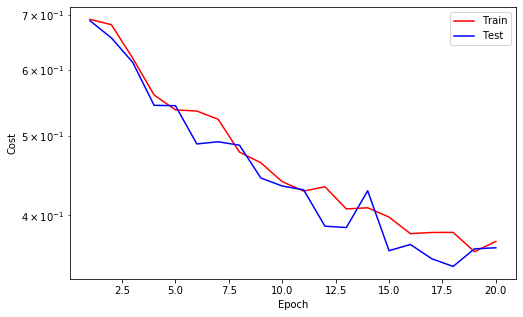

==> EarlyStop patience =  2 | Best test_cost: 0.3469




Epoch    21
Train_cost  = 0.3766 | Test_cost  = 0.3342 | 




Epoch    22
Train_cost  = 0.3898 | Test_cost  = 0.3651 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3342




Epoch    23
Train_cost  = 0.3928 | Test_cost  = 0.3402 | 
==> EarlyStop patience =  2 | Best test_cost: 0.3342




Epoch    24
Train_cost  = 0.3800 | Test_cost  = 0.3541 | 
==> EarlyStop patience =  3 | Best test_cost: 0.3342




Epoch    25
Train_cost  = 0.3506 | Test_cost  = 0.3351 | 
==> EarlyStop patience =  4 | Best test_cost: 0.3342




Epoch    26
Train_cost  = 0.3354 | Test_cost  = 0.3241 | 




Epoch    27
Train_cost  = 0.3293 | Test_cost  = 0.3262 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3241




Epoch    28
Train_cost  = 0.3228 | Test_cost  = 0.3202 | 




Epoch    29
Train_cost  = 0.3327 | Test_cost  = 0.3123 | 




Epoch    30
Train_cost  = 0.3178 | Test_cost  = 0.3232 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3123




Epoch    31
Train_cost  = 0.3154 | Test_cost  = 0.3344 | 
==> EarlyStop patience =  2 | Best test_cost: 0.3123




Epoch    32
Train_cost  = 0.3024 | Test_cost  = 0.2999 | 




Epoch    33
Train_cost  = 0.3057 | Test_cost  = 0.3116 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2999




Epoch    34
Train_cost  = 0.3124 | Test_cost  = 0.2958 | 




Epoch    35
Train_cost  = 0.3174 | Test_cost  = 0.3133 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2958




Epoch    36
Train_cost  = 0.3220 | Test_cost  = 0.3033 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2958




Epoch    37
Train_cost  = 0.3180 | Test_cost  = 0.3053 | 
==> EarlyStop patience =  3 | Best test_cost: 0.2958




Epoch    38
Train_cost  = 0.2934 | Test_cost  = 0.2943 | 




Epoch    39
Train_cost  = 0.2875 | Test_cost  = 0.2815 | 




Epoch    40
Train_cost  = 0.2852 | Test_cost  = 0.2930 | 


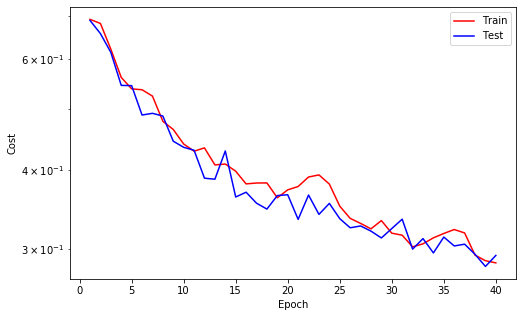

==> EarlyStop patience =  1 | Best test_cost: 0.2815




Epoch    41
Train_cost  = 0.2785 | Test_cost  = 0.2735 | 




Epoch    42
Train_cost  = 0.2611 | Test_cost  = 0.2980 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2735




Epoch    43
Train_cost  = 0.2676 | Test_cost  = 0.2848 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2735




Epoch    44
Train_cost  = 0.2678 | Test_cost  = 0.2765 | 
==> EarlyStop patience =  3 | Best test_cost: 0.2735




Epoch    45
Train_cost  = 0.2597 | Test_cost  = 0.2867 | 
==> EarlyStop patience =  4 | Best test_cost: 0.2735




Epoch    46
Train_cost  = 0.2633 | Test_cost  = 0.3215 | 
==> EarlyStop patience =  5 | Best test_cost: 0.2735
==> Execute Early Stopping at epoch: 46 | Best test_cost: 0.2735
==> Best model is saved at model


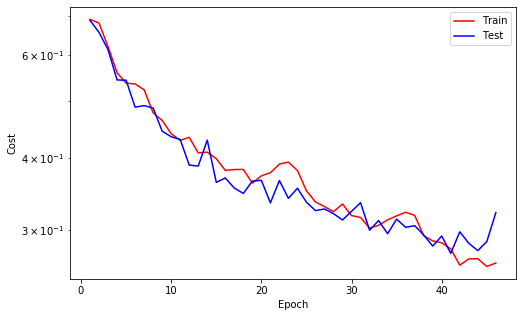

In [32]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

In [34]:
from jcopdl.layers import conv_block,linear_block
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)


In [36]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds
label2cat=train_set.classes

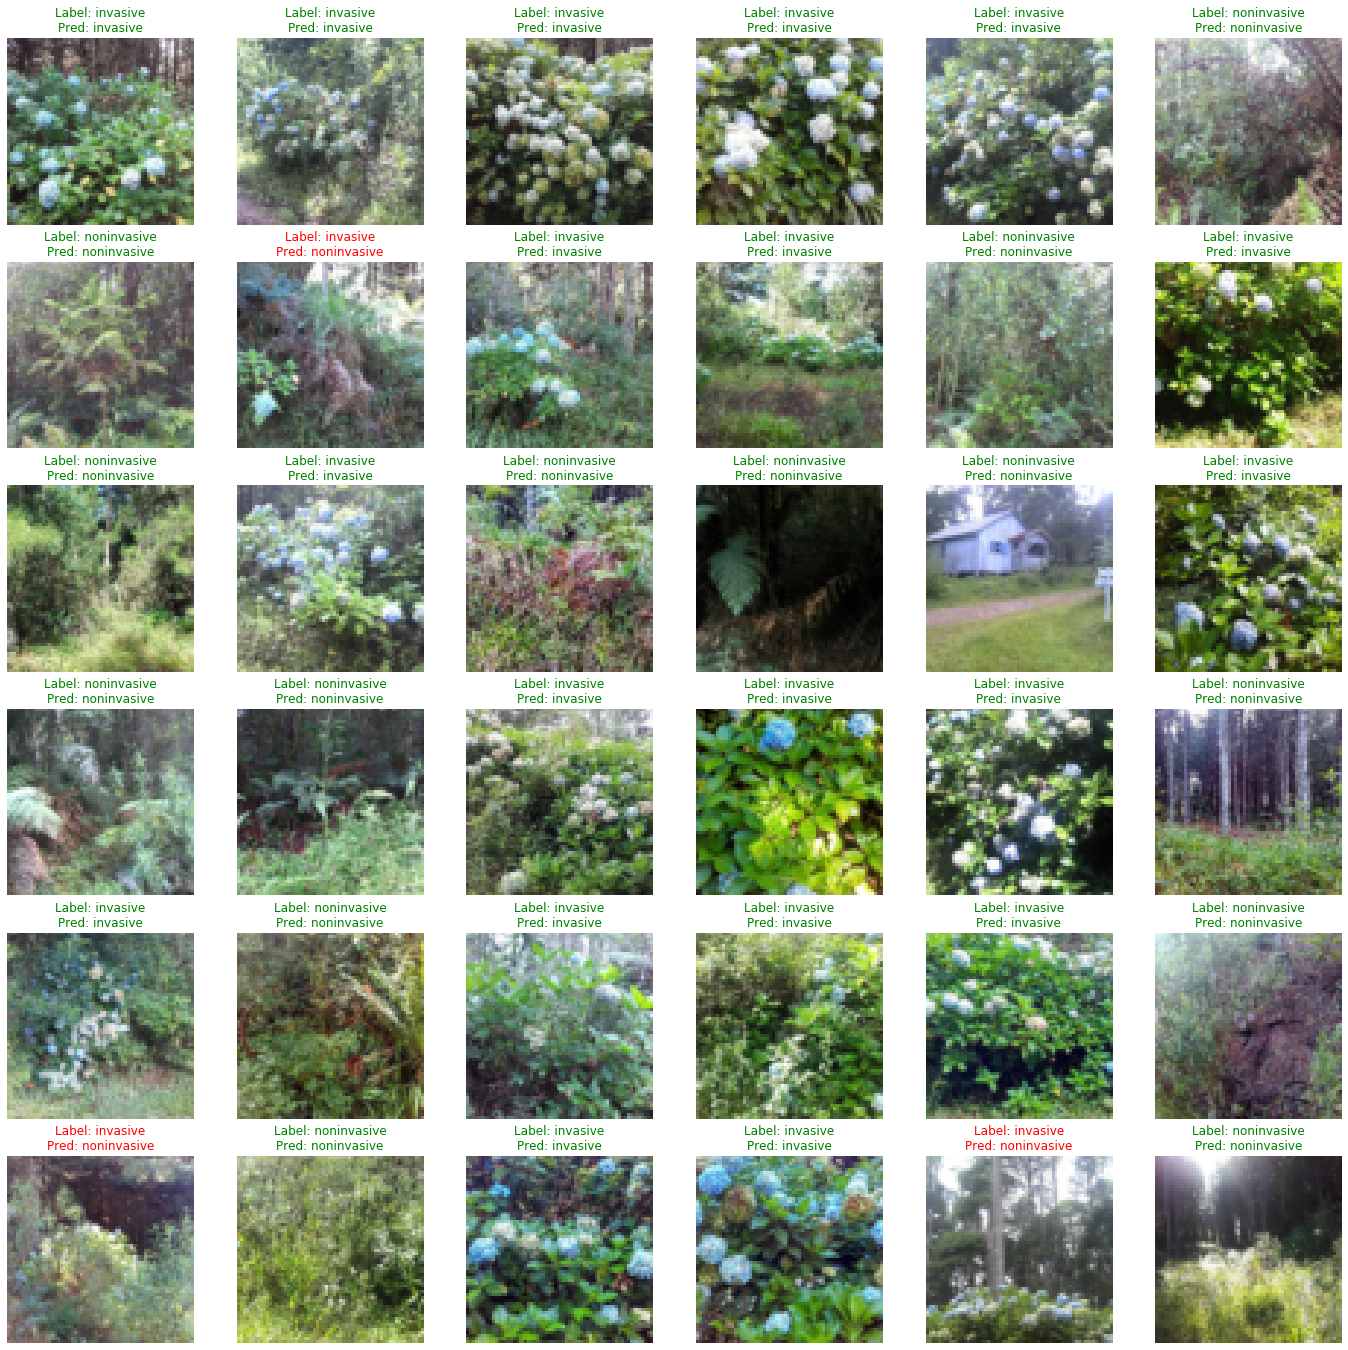

In [38]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if pred != label else {"color": 'g'} # kalau prediksi nya sama maka warna hijau kalau beda maka warnanya merah
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label: {label}\nPred: {pred}", fontdict=font);
    ax.axis('off');